In [2]:
from helpers import *

In [35]:
df = pd.read_csv("scores/scores_kmeans.csv")
df.head()

,n_cluster,silhouette,calinski_harabasz,davies_bouldin,type,model_path
0,3,0.678419,404411.210863,0.468037,kmeans-pca-lloyd,./models/kmeans_pca_model_3_lloyd.pkl
1,3,0.358265,68436.256211,0.890637,kmeans-tsne-pca-lloyd,./models/kmeans_tsne_pca_model_3_lloyd.pkl
2,3,0.361182,69875.529315,0.905644,kmeans-tsne-lloyd,./models/kmeans_tsne_model_3_lloyd.pkl
3,3,0.649430,409245.069870,0.406945,kmeans-pca-elkan,./models/kmeans_pca_model_3_elkan.pkl
4,3,0.358010,68299.319535,0.890481,kmeans-tsne-pca-elkan,./models/kmeans_tsne_pca_model_3_elkan.pkl


In [36]:
inertias_tsne

[]

In [37]:
inertias_pca = []
inertias_tsne = []
inertias_tsne_pca = []

# inertias_pca.append((n_cluster, algo, kmeans_pca.inertia_))

for _, row in df.iterrows():
   # Load the model  
    with open(row["model_path"], 'rb') as f:  
        model = pickle.load(f)
        
    inertia = model.inertia_  
    if "kmeans_pca_model" in row["model_path"]:  
        inertias_pca.append((row["n_cluster"], row["type"].replace("kmeans-pca-", ""), model.inertia_))  
    if "kmeans_tsne_pca_model" in row["model_path"]:  
        inertias_tsne_pca.append((row["n_cluster"], row["type"].replace("kmeans-tsne-pca-", ""), model.inertia_))  
    if "kmeans_tsne_model" in row["model_path"]:  
        inertias_tsne.append((row["n_cluster"], row["type"].replace("kmeans-tsne-", ""), model.inertia_)) 

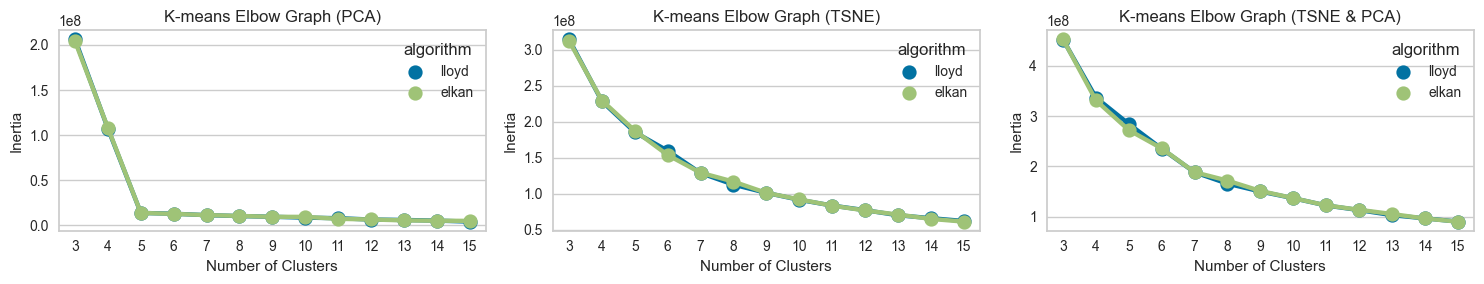

In [40]:
# Create the figure and axis objects  
fig, axs = plt.subplots(1, 3, figsize=(15, 3))  
  
# Plotting the elbow graph (PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[0])  
axs[0].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (PCA)')  
  
# Plotting the elbow graph (TSNE)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[1])  
axs[1].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE)')  
  
# Plotting the elbow graph (TSNE & PCA)  
sns.pointplot(x='n_cluster', y='inertia', hue='algorithm', data=pd.DataFrame(inertias_tsne_pca, columns=['n_cluster', 'algorithm', 'inertia']), ax=axs[2])  
axs[2].set(xlabel='Number of Clusters', ylabel='Inertia', title='K-means Elbow Graph (TSNE & PCA)')  
  
# Adjust the spacing between plots  
plt.tight_layout()  
  
# Show the plots  
plt.show()  